In [39]:
# read the hotel reservation file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from scipy import stats
import plotly.express as px
from sklearn.manifold import TSNE
hotel = pd.read_csv('Hotel Reservations.csv')

In [49]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [5]:
categorical_columns = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest",
    "booking_status"
]

hotel = hotel.drop(['Booking_ID'], axis=1)    # Booking_ID is useless

numerical_columns = hotel.columns.difference(categorical_columns)


# Preprocessing
**Delete rows that normally would not make sense, such as :**
- reservation without any adults (139 rows)

In [67]:

# check for null number 
print(hotel.isnull().sum())
print("Empty room reservations : ", len(hotel[(hotel["no_of_adults"]==0) & (hotel["no_of_children"]>0)]))    # check for abnormal values

hotel.drop(hotel[(hotel["no_of_adults"]==0) & (hotel["no_of_children"]>0)].index,axis=0, inplace=True)    # Drop person number = 0


no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
Empty room reservations :  139


# Central tendency of numerical variables

In [6]:
hotel[numerical_columns].describe()    # check for outliers dsa

arrival_date  arrival_month  arrival_year  avg_price_per_room  \
count  36136.000000   36136.000000  36136.000000        36136.000000   
mean      15.589883       7.424424   2017.820013          103.507653   
std        8.740466       3.068408      0.384182           35.061640   
min        1.000000       1.000000   2017.000000            0.000000   
25%        8.000000       5.000000   2018.000000           80.375000   
50%       16.000000       8.000000   2018.000000           99.455000   
75%       23.000000      10.000000   2018.000000          120.120000   
max       31.000000      12.000000   2018.000000          540.000000   

          lead_time  no_of_adults  no_of_children  \
count  36136.000000  36136.000000    36136.000000   
mean      85.182090      1.852059        0.097880   
std       85.951426      0.506908        0.385097   
min        0.000000      1.000000        0.000000   
25%       17.000000      2.000000        0.000000   
50%       57.000000      2.000000        0.000000   
75%      126.000000      2.000000        0.000000   
max      443.000000      4.000000       10.000000   

       no_of_previous_bookings_not_canceled  no_of_previous_cancellations  \
count                          36136.000000                  36136.000000   
mean                               0.154002                      0.023439   
std                                1.757515                      0.369036   
min                                0.000000                      0.000000   
25%                                0.000000                      0.000000   
50%                                0.000000                      0.000000   
75%                                0.000000                      0.000000   
max                               58.000000                     13.000000   

       no_of_special_requests  no_of_week_nights  no_of_weekend_nights  
count            36136.000000       36136.000000          36136.000000  
mean                 0.618414           2.203592              0.810272  
std                  0.785564           1.410836              0.870519  
min                  0.000000           0.000000              0.000000  
25%                  0.000000           1.000000              0.000000  
50%                  0.000000           2.000000              1.000000  
75%                  1.000000           3.000000              2.000000  
max                  5.000000          17.000000              7.000000

# Spreading/distribution

### Skeweness
- Skewness = 0 (normally distributed)
- Skewness > 0 (positively skewed. Longer tail on the right side of the distribution) <br />
In positively skewed, the mean of the data is greater than the median (a large number of data-pushed on the right-hand side). A high level of skewness can cause misleading results.
- Skewness < 0 (negatively skewed. Longer tail on the left side of the distribution) <br />
In negatively skewed, the mean of the data is less than the median (a large number of data-pushed on the left-hand side).

### Kurtosis
- Excess Kurtosis = Kurtosis - 3 (0 for normal distribution)
- Leptokurtic: Kurtosis > 0 (more outliers than normal distribution)
- Platykurtic: Kurtosis < 0 (fewer outliers than normal distribution)

In [7]:
# imprastierea variabilelor numerice
def dispersion(col):
    return [col.max() - col.min(), col.var(), col.std(), col.skew(), col.kurt()]

dispersion_table = pd.DataFrame(columns=['Range', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])
for column in numerical_columns:
    dispersion_table.loc[column] = dispersion(hotel[column])

dispersion_table


Range     Variance  Standard Deviation  \
arrival_date                           30.0    76.395740            8.740466   
arrival_month                          11.0     9.415127            3.068408   
arrival_year                            1.0     0.147596            0.384182   
avg_price_per_room                    540.0  1229.318596           35.061640   
lead_time                             443.0  7387.647595           85.951426   
no_of_adults                            3.0     0.256956            0.506908   
no_of_children                         10.0     0.148299            0.385097   
no_of_previous_bookings_not_canceled   58.0     3.088861            1.757515   
no_of_previous_cancellations           13.0     0.136188            0.369036   
no_of_special_requests                  5.0     0.617111            0.785564   
no_of_week_nights                      17.0     1.990457            1.410836   
no_of_weekend_nights                    7.0     0.757803            0.870519   

                                       Skewness    Kurtosis  
arrival_date                           0.029624   -1.156948  
arrival_month                         -0.348185   -0.933292  
arrival_year                          -1.666040    0.775731  
avg_price_per_room                     0.676135    3.158032  
lead_time                              1.294455    1.184577  
no_of_adults                          -0.215035    0.534689  
no_of_children                         4.965036   42.747885  
no_of_previous_bookings_not_canceled  19.213120  455.617403  
no_of_previous_cancellations          25.151407  729.915012  
no_of_special_requests                 1.145437    0.877823  
no_of_week_nights                      1.598537    7.800162  
no_of_weekend_nights                   0.739832    0.307992

The big values for Kurtosis on columns: {'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'}  are due to the fact that most of values 
for these variables are 0 and the other variables that appear could be interpreted as outliers. 
Also, a value for Skewness between -0.5 and 0.5 is symmetrical and we can see that on some columns: {'no_of_adults', 'arrival_month', 'arrival_date' }

# Frequencies of categorical attributes

In [8]:
freq_table = pd.DataFrame(columns=['Value','Frequency', 'Percentage'])
for column in categorical_columns:
    freq_table.loc[column] = [hotel[column].value_counts().index[0], hotel[column].value_counts()[0], hotel[column].value_counts()[0] / len(hotel[column]) * 100]

freq_table

Value Frequency  Percentage
type_of_meal_plan            Meal Plan 1     27698   76.649325
required_car_parking_space           0.0   35013.0   96.892296
room_type_reserved           Room_Type 1     28127   77.836507
market_segment_type               Online     23080   63.869825
repeated_guest                       0.0   35206.0   97.426389
booking_status              Not_Canceled     24295   67.232123

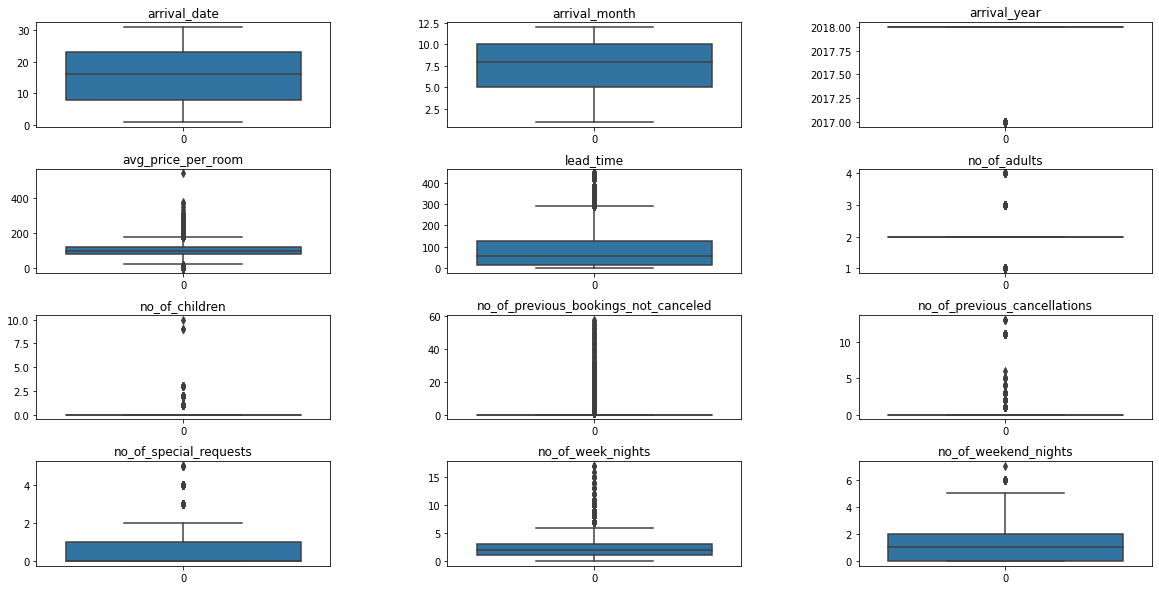

In [13]:
# graphs (box plot)
def box_plot(col):
    plt.boxplot(col)
    plt.title(col.name)
    plt.show()

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(numerical_columns):
    fig.add_subplot(4, 3, i+1)
    sns.boxplot(hotel[col])  
    plt.title(col)


We can observe that for {no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_children'} we don't see the box because of too many 0 values: so the min, Q1, median and also the Q3 are equal to 0.

# Histograms for numeric attributes

<Figure size 720x720 with 0 Axes>

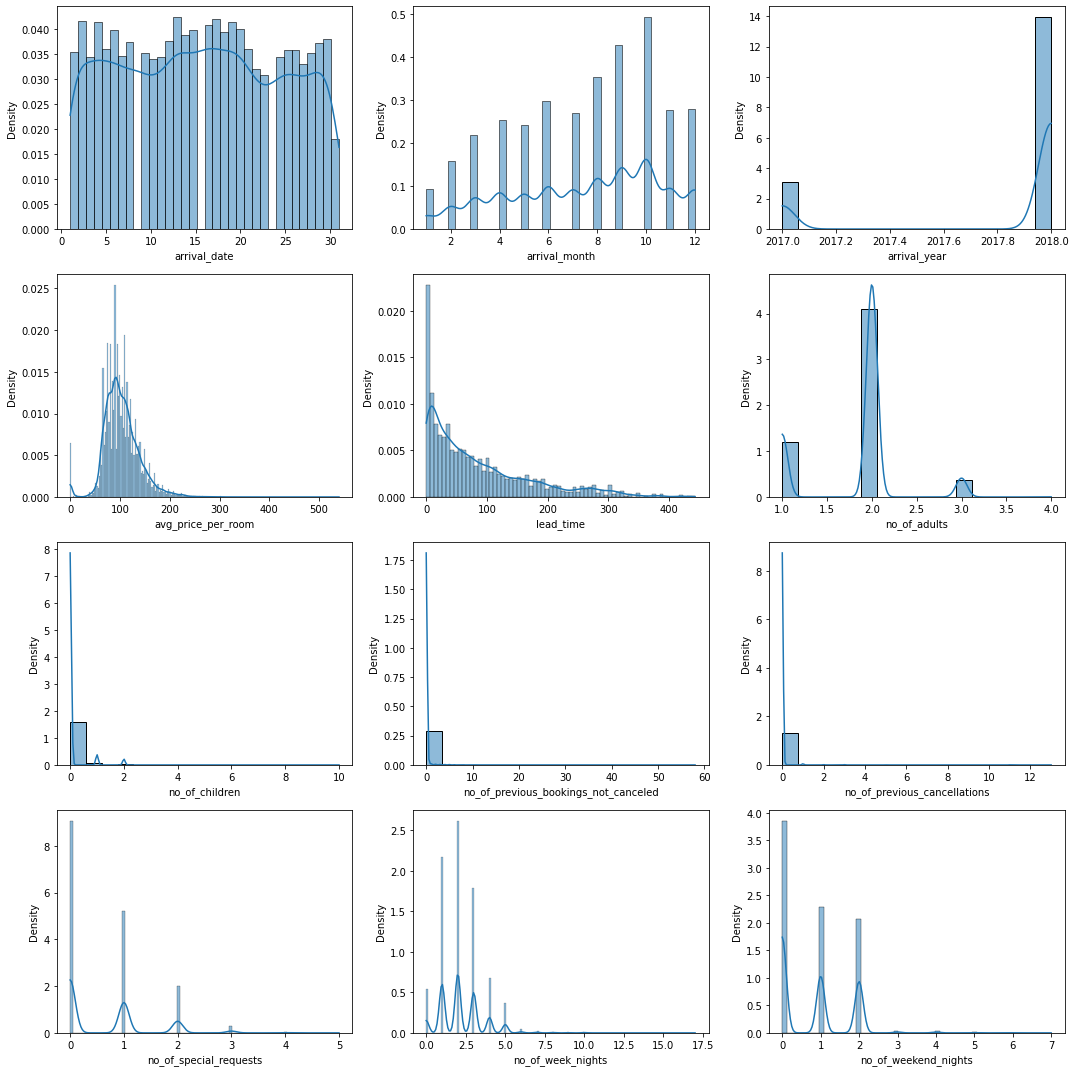

In [14]:
figure = plt.figure()
figure.set_size_inches(10, 10)
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
figure.subplots_adjust(hspace = 1, wspace = 0.4)

for i, ax in enumerate(axes.flat, start=1):
    # kde = True -> Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:
    # stat = 'density' -> Normalize the histogram to form a probability density: normalize such that the total area of the histogram equals 1
    sns.histplot(hotel[numerical_columns[i-1]], ax=ax, kde=True, stat='density')

# padding between subplots
plt.tight_layout()
plt.show()



# Histograms for categorical attributes

<Figure size 720x720 with 0 Axes>

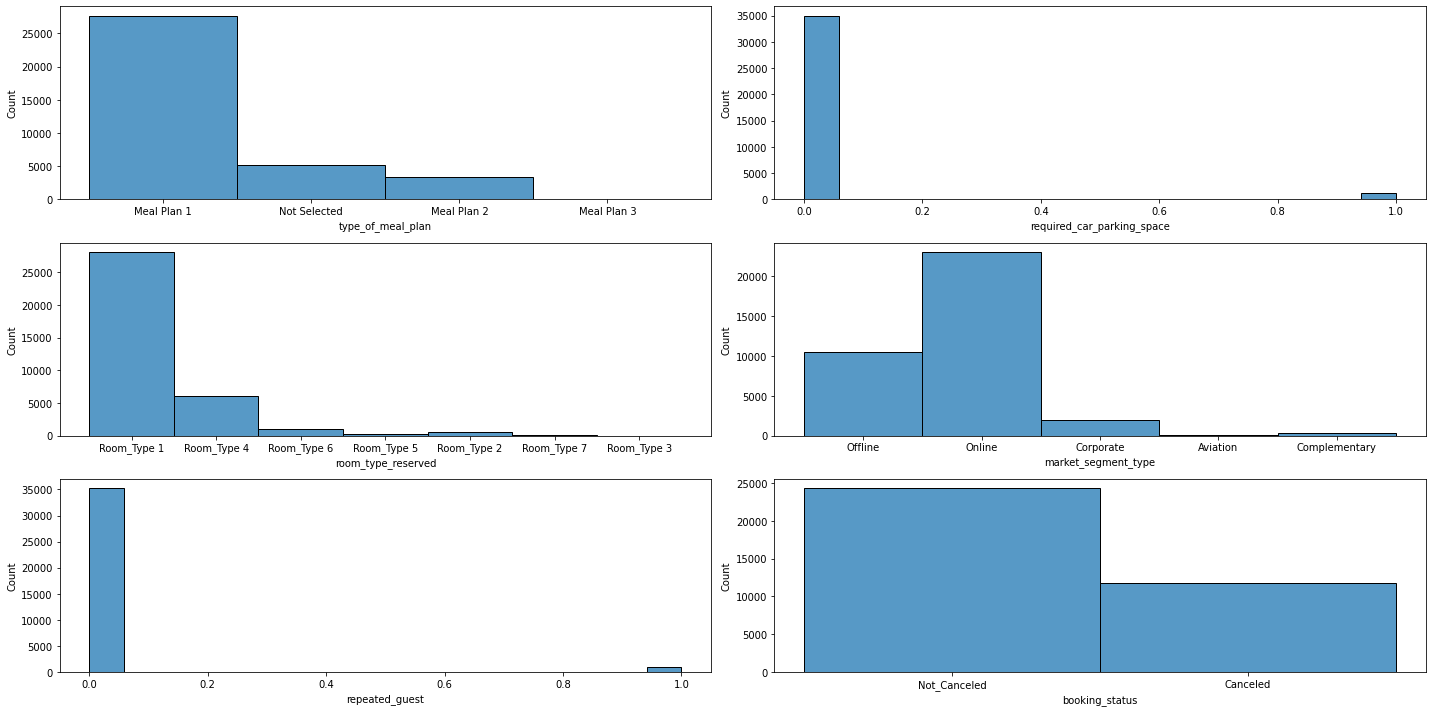

In [15]:
figure = plt.figure()
figure.set_size_inches(10, 10)
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
figure.subplots_adjust(hspace = 1, wspace = 0.4)

for i, ax in enumerate(axes.flat, start=1):
    sns.histplot(hotel[categorical_columns[i-1]], ax=ax)

plt.tight_layout()
plt.show()


# Bivariate analysis

### Calculation of the correlation between numerical variables

In [16]:
corr_matrix = hotel[numerical_columns].corr()
corr_matrix

arrival_date  arrival_month  \
arrival_date                              1.000000      -0.043546   
arrival_month                            -0.043546       1.000000   
arrival_year                              0.018952      -0.339944   
avg_price_per_room                        0.018237       0.053747   
lead_time                                 0.005717       0.136309   
no_of_adults                              0.030028       0.021528   
no_of_children                            0.022648      -0.002276   
no_of_previous_bookings_not_canceled     -0.001430      -0.010766   
no_of_previous_cancellations             -0.012515      -0.038724   
no_of_special_requests                    0.017830       0.110130   
no_of_week_nights                        -0.009551       0.037266   
no_of_weekend_nights                      0.027170      -0.010103   

                                      arrival_year  avg_price_per_room  \
arrival_date                              0.018952            0.018237   
arrival_month                            -0.339944            0.053747   
arrival_year                              1.000000            0.179146   
avg_price_per_room                        0.179146            1.000000   
lead_time                                 0.143256           -0.062617   
no_of_adults                              0.082675            0.296445   
no_of_children                            0.043137            0.366890   
no_of_previous_bookings_not_canceled      0.026544           -0.114204   
no_of_previous_cancellations              0.003991           -0.063665   
no_of_special_requests                    0.052832            0.185859   
no_of_week_nights                         0.032583            0.023530   
no_of_weekend_nights                      0.055111           -0.005090   

                                      lead_time  no_of_adults  no_of_children  \
arrival_date                           0.005717      0.030028        0.022648   
arrival_month                          0.136309      0.021528       -0.002276   
arrival_year                           0.143256      0.082675        0.043137   
avg_price_per_room                    -0.062617      0.296445        0.366890   
lead_time                              1.000000      0.102057       -0.052184   
no_of_adults                           0.102057      1.000000        0.048947   
no_of_children                        -0.052184      0.048947        1.000000   
no_of_previous_bookings_not_canceled  -0.078218     -0.123404       -0.020514   
no_of_previous_cancellations          -0.045763     -0.049513       -0.015949   
no_of_special_requests                -0.102255      0.200499        0.122734   
no_of_week_nights                      0.149263      0.110338        0.023171   
no_of_weekend_nights                   0.046006      0.108038        0.028651   

                                      no_of_previous_bookings_not_canceled  \
arrival_date                                                     -0.001430   
arrival_month                                                    -0.010766   
arrival_year                                                      0.026544   
avg_price_per_room                                               -0.114204   
lead_time                                                        -0.078218   
no_of_adults                                                     -0.123404   
no_of_children                                                   -0.020514   
no_of_previous_bookings_not_canceled                              1.000000   
no_of_previous_cancellations                                      0.468136   
no_of_special_requests                                            0.027592   
no_of_week_nights                                                -0.049398   
no_of_weekend_nights                                             -0.026321   

                                      no_of_previous_cancellations  \
arrival_date                          

<AxesSubplot:>

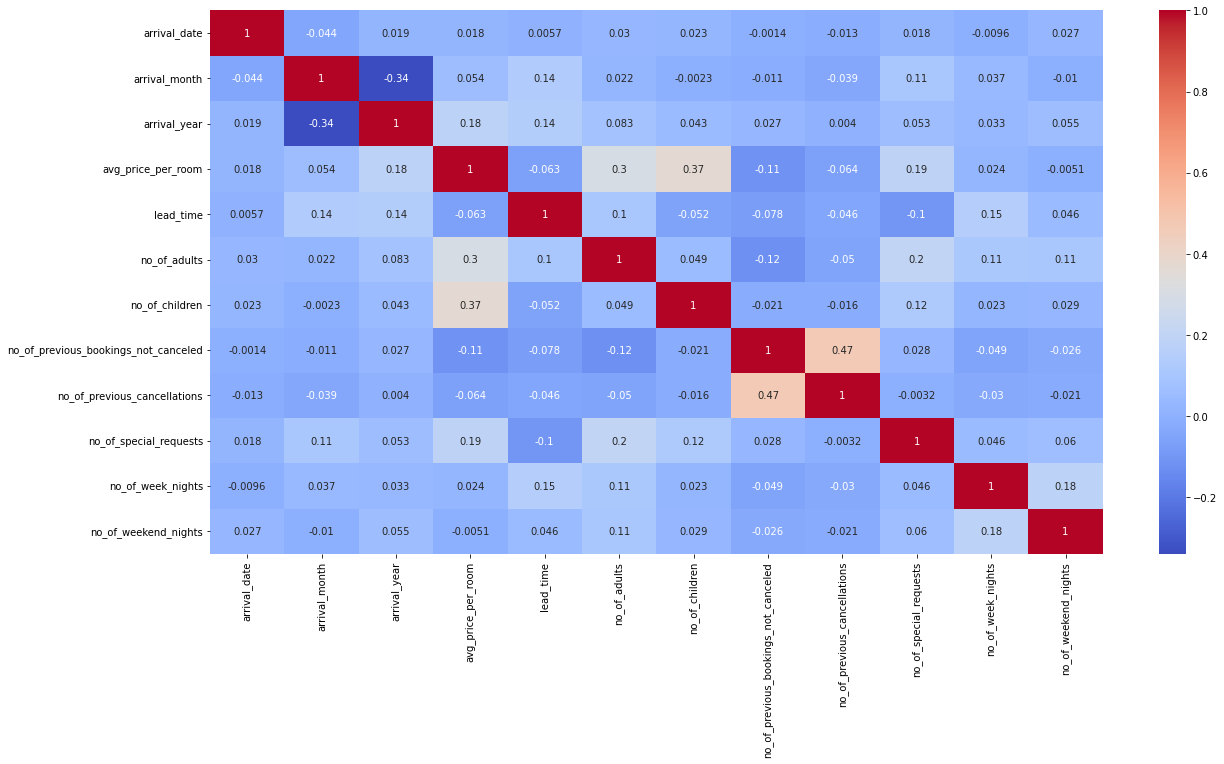

In [17]:
# make the graphic wider
plt.figure(figsize=(20, 10))
# show value with a heatmap in order to see the correlation between the variables better
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

* We noticed a correlation between the number of adults and the average price of the room, between the number of children and the average price of the room (with the increase in the number of people, the price of the room also increases).

## Teste de independenta


### Chi-square test for categorical attributes
Like all hypothesis tests, the chi-square test of independence evaluates a null and alternative hypothesis. The hypotheses are two competing answers to the question “Are variable 1 and variable 2 related?”

    Null hypothesis (H0): Variable 1 and variable 2 are not related in the population; The proportions of variable 1 are the same for different values of variable 2.
    Alternative hypothesis (Ha): Variable 1 and  variable 2 are related in the population; The proportions of variable 1 are not the same for different values of  variable 2.


<Figure size 500x500 with 0 Axes>

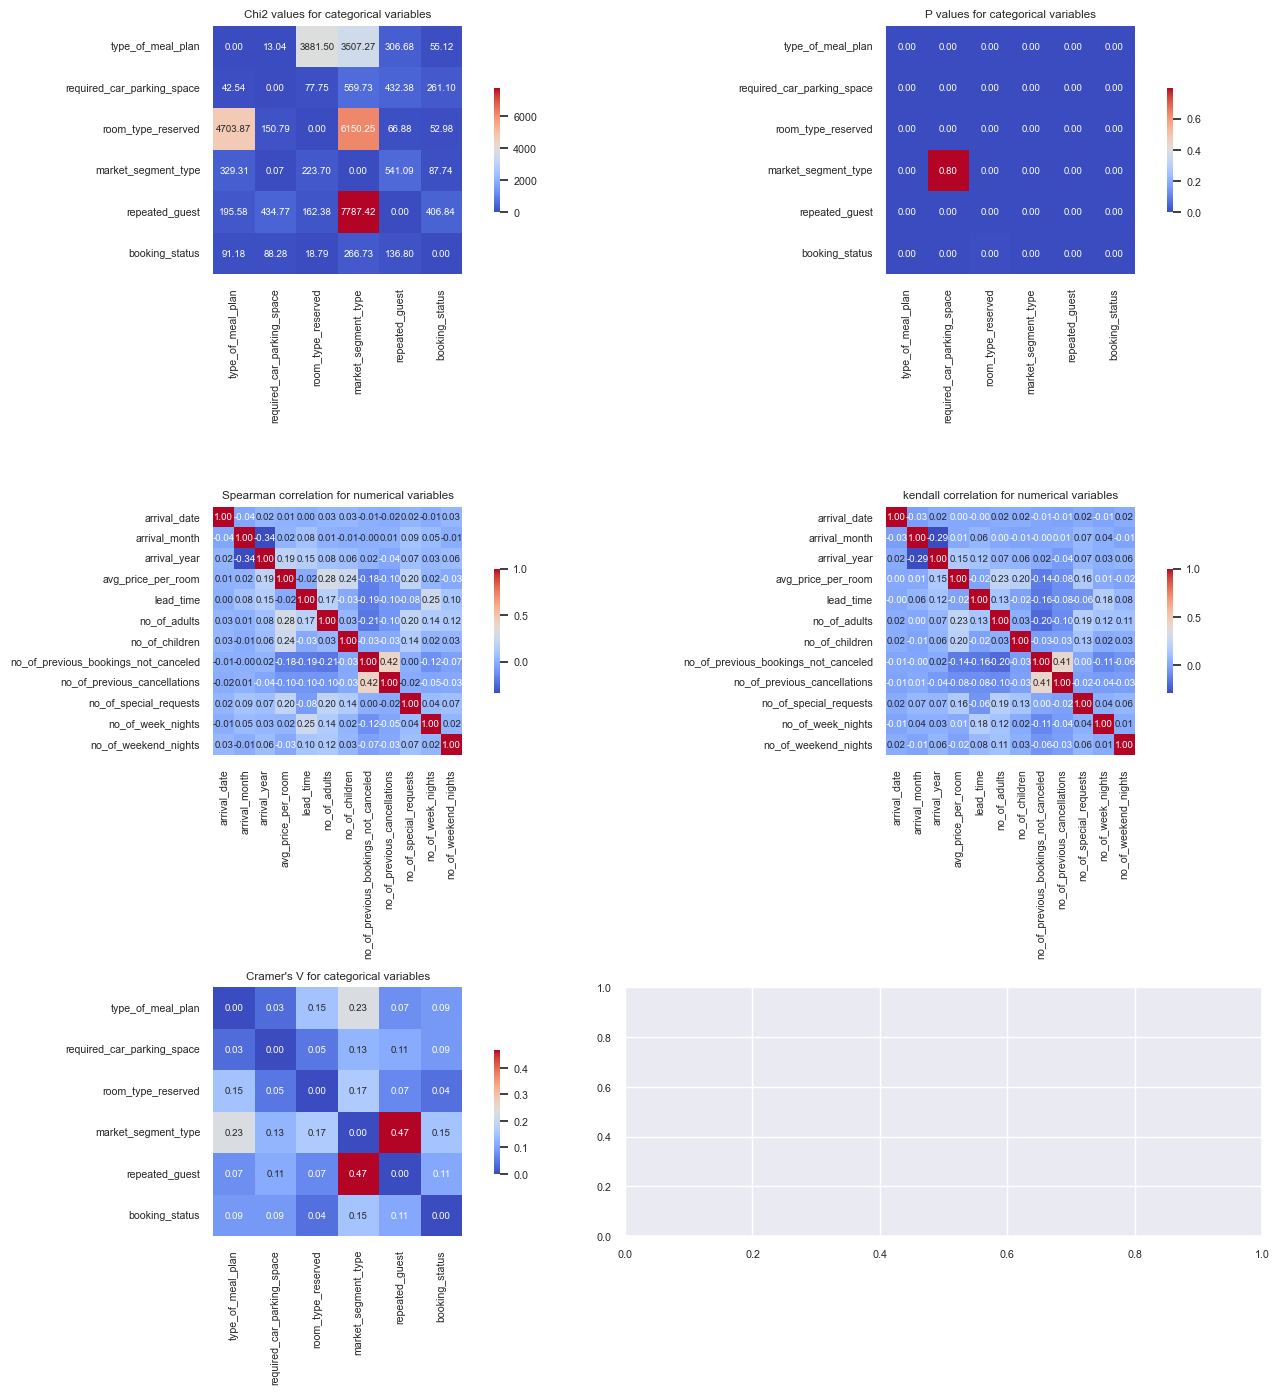

In [38]:
from sklearn.feature_selection import chi2
import numpy as np

resultant = pd.DataFrame(data=[(0 for _ in range(len(categorical_columns))) for _ in range(len(categorical_columns))],
                         columns=list(categorical_columns))
resultant.set_index(pd.Index(list(categorical_columns)), inplace = True)

resultant_chi = pd.DataFrame(data=[(0 for _ in range(len(categorical_columns))) for _ in range(len(categorical_columns))],
                         columns=list(categorical_columns))
resultant_chi.set_index(pd.Index(list(categorical_columns)), inplace = True)
 

for column in categorical_columns:
    # convert the categorical variable into dummy/indicator variables
    hotel[column] = pd.Categorical(hotel[column]).codes

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            chi2_val, p_val = chi2(np.array(hotel[col1]).reshape(-1, 1), np.array(hotel[col2]).reshape(-1, 1))
            resultant.loc[col1, col2] = p_val
            resultant_chi.loc[col1, col2] = chi2_val

#Spearman correlation
spearman_corr = hotel[numerical_columns].corr(method='spearman')

#Kendall correlation
kendall_corr = hotel[numerical_columns].corr(method='kendall')

#Cramer's V
cramer_v = pd.DataFrame(data=[(0 for _ in range(len(categorical_columns))) for _ in range(len(categorical_columns))],
                        columns=list(categorical_columns))
cramer_v.set_index(pd.Index(list(categorical_columns)), inplace = True)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(hotel[col1], hotel[col2])
            cramer = stats.contingency.association(contingency_table, method="cramer")
            cramer_v.loc[col1, col2] = cramer
            cramer_v.loc[col2, col1] = cramer

titles= ['Chi2 values for categorical variables','P values for categorical variables', 'Spearman correlation for numerical variables',
         'kendall correlation for numerical variables', 'Cramer\'s V for categorical variables']
values = [resultant_chi, resultant, spearman_corr, kendall_corr, cramer_v]

figure = plt.figure()
figure.set_size_inches(5, 5)
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
figure.subplots_adjust(hspace = 1, wspace = 0.4)
sns.set(font_scale=.7)

for i, ax in enumerate(axes.flat, start=1):
    ax.set_title(titles[i-1])
    sns.heatmap(values[i-1], annot=True, cmap='coolwarm', ax=ax, square=True, cbar_kws={'shrink': .5}, annot_kws={'size': 7}, fmt='.2f')
    if i == len(titles):
        break

plt.tight_layout()
plt.show()


Skewness can be calculated using various methods, whereas the most commonly used method is Pearson’s coefficient. We usee three more methods: 
* Spearman’s correlation : To measure nonlinear correlation
* Kendall's correlation : Is a non-parametric measure of relationships between columns
* Cramers's correlation

## Tests that compare multiple populations
### Anova test
* Is a statistical test used to determine whether there are significant differences between the means of two or more groups

<Axes: >

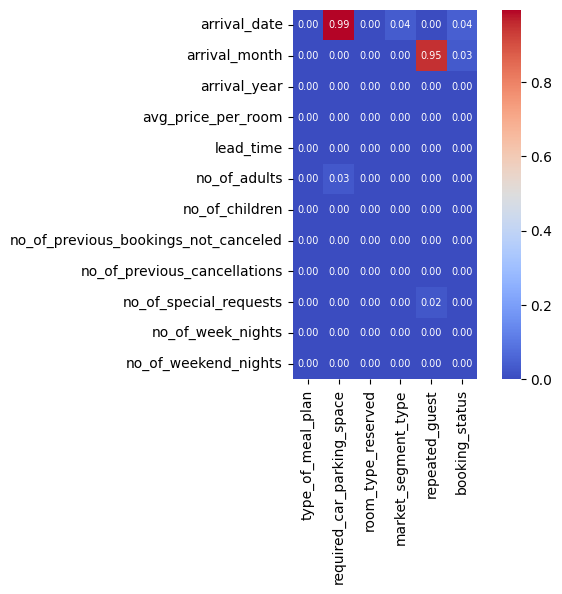

In [6]:
# anova heatmap for numerical variables and categorical variables
anova_df = pd.DataFrame(data=[(0 for _ in range(len(categorical_columns))) for _ in range(len(numerical_columns))],
                        columns=list(categorical_columns))
anova_df.set_index(pd.Index(list(numerical_columns)), inplace = True)

for col1 in numerical_columns:
    for col2 in categorical_columns:
        groups = hotel.groupby(col2)[col1].apply(list).values
        pvalue = stats.f_oneway(*groups)[1]
        anova_df.loc[col1, col2] = pvalue 

sns.heatmap(anova_df, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 7}, fmt='.2f')


* A big p-value means a weaker association: as we can observe between {'required_car_parking_space'} and {'arrival_date'} and also between 
{'repeated_quests'} and {'arrival_month'}.

### Scatterplots

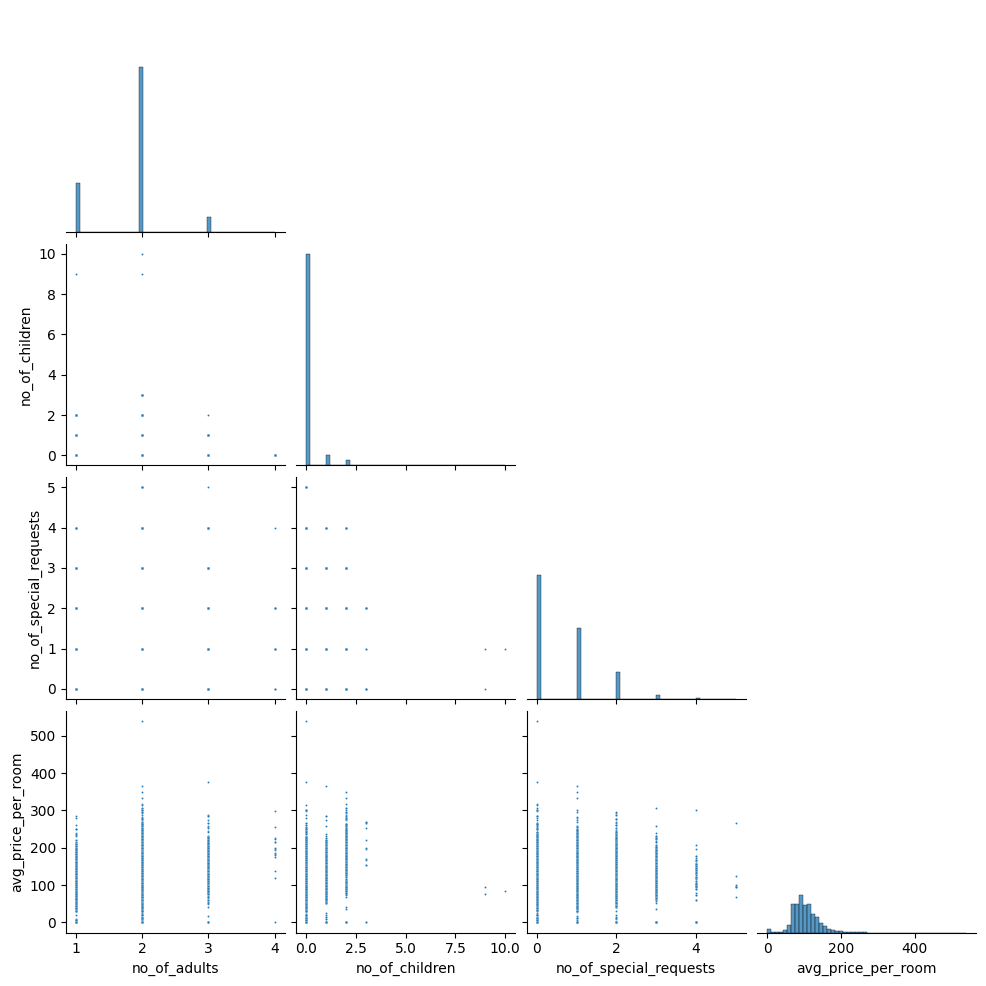

In [81]:
scatter_columns = [
    "no_of_adults",
    "no_of_children",
    "no_of_special_requests",
    "avg_price_per_room",
]

sns.pairplot(hotel[scatter_columns], diag_kind='hist', corner=True, plot_kws={'s': 2}, diag_kws={'bins': 50})

### 3D Scatterplots

In [56]:
%matplotlib widget

# 3d grafic (atribute numerice)
def scatter_3d_plot(name1, name2, name3):
    fig = px.scatter_3d(hotel, x=name1, y=name2, z=name3)
    fig.show()

first_column = hotel["lead_time"].copy()
second_column = hotel["booking_status"].copy()
third_column = hotel["market_segment_type"].copy()
first_name = "lead_time"
second_name = "booking_status"
third_name = "market_segment_type"

scatter_3d_plot(first_name, second_name, third_name)

### Principal component analysis

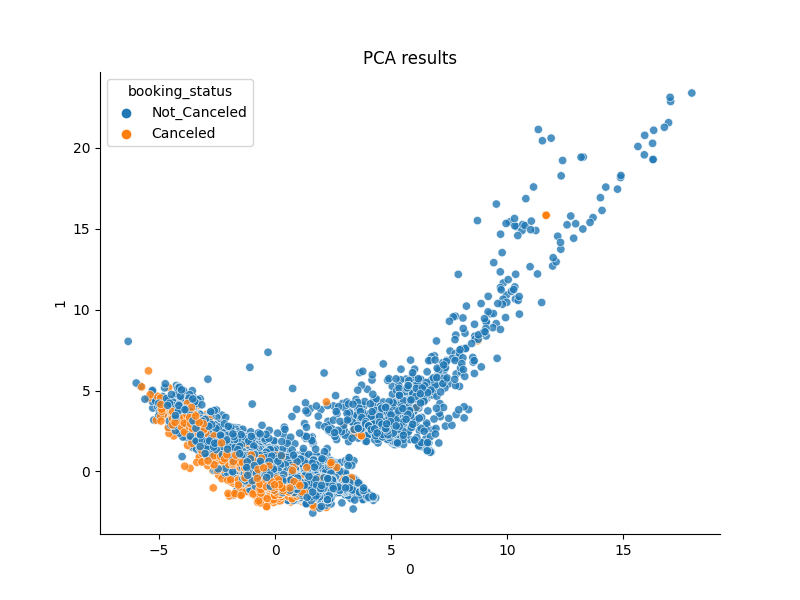

([<matplotlib.axis.XTick at 0x21ef21e3d60>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

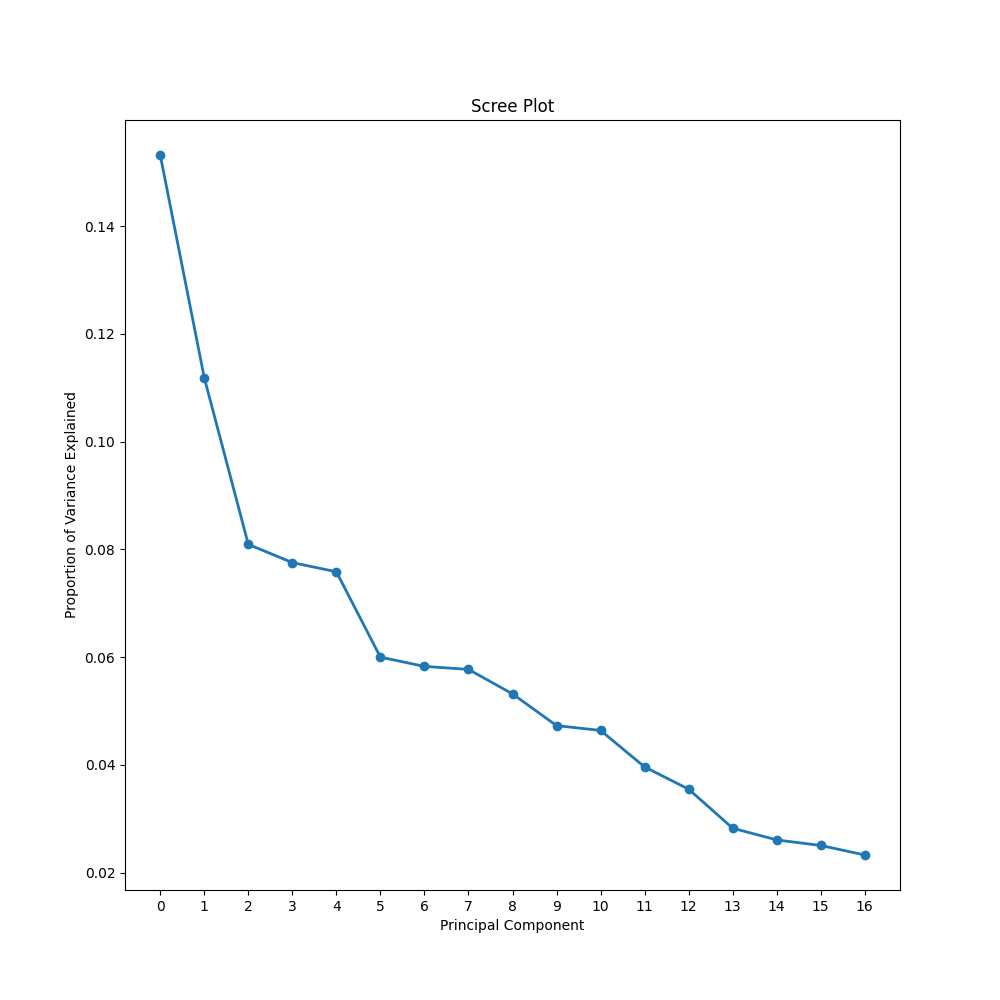

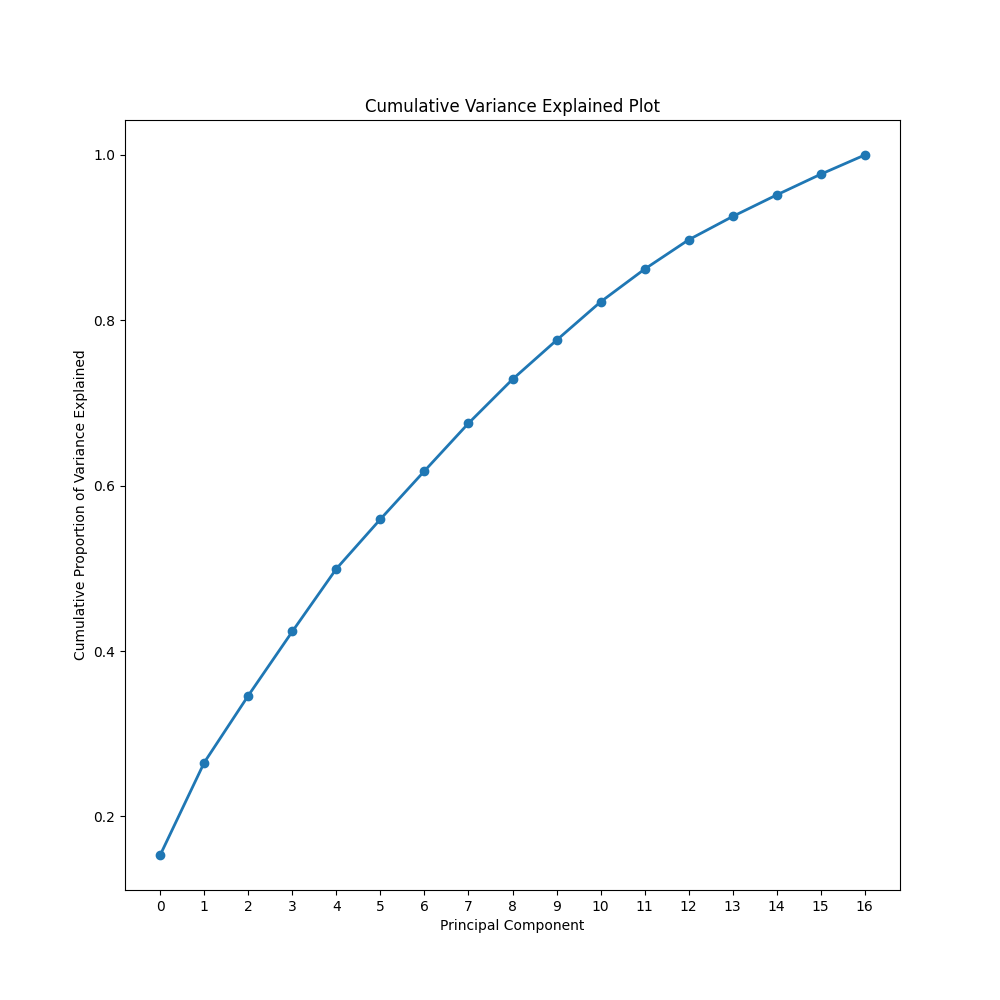

In [70]:
import numpy as np
x= hotel.drop("booking_status", axis = 1)
y = hotel["booking_status"]

numcols = x.select_dtypes(["int64","float64"]).columns
catcols = x.select_dtypes("object").columns

from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()

for catcol in catcols:
    x[catcol] = x[catcol].astype("category").cat.codes

scaler.fit(x)
x_scaled = scaler.transform(x)

train_features = x_scaled

from sklearn.decomposition import PCA
PCA = PCA(n_components = 17)

PCA.fit(train_features)

x_pca =PCA.transform(train_features)
pca = pd.DataFrame(x_pca)
pca_y = pca.join(y)

plt.figure(figsize=(8,6))
sns.scatterplot(data = pca_y, x=0, y=1, hue="booking_status", alpha = .8)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("PCA results")

plt.show()

plt.figure(figsize=(10, 10))
plt.plot(PCA.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(17))

# cumulative variance explained plot
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(PCA.explained_variance_ratio_), 'o-', linewidth=2)
plt.title('Cumulative Variance Explained Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xticks(range(17))

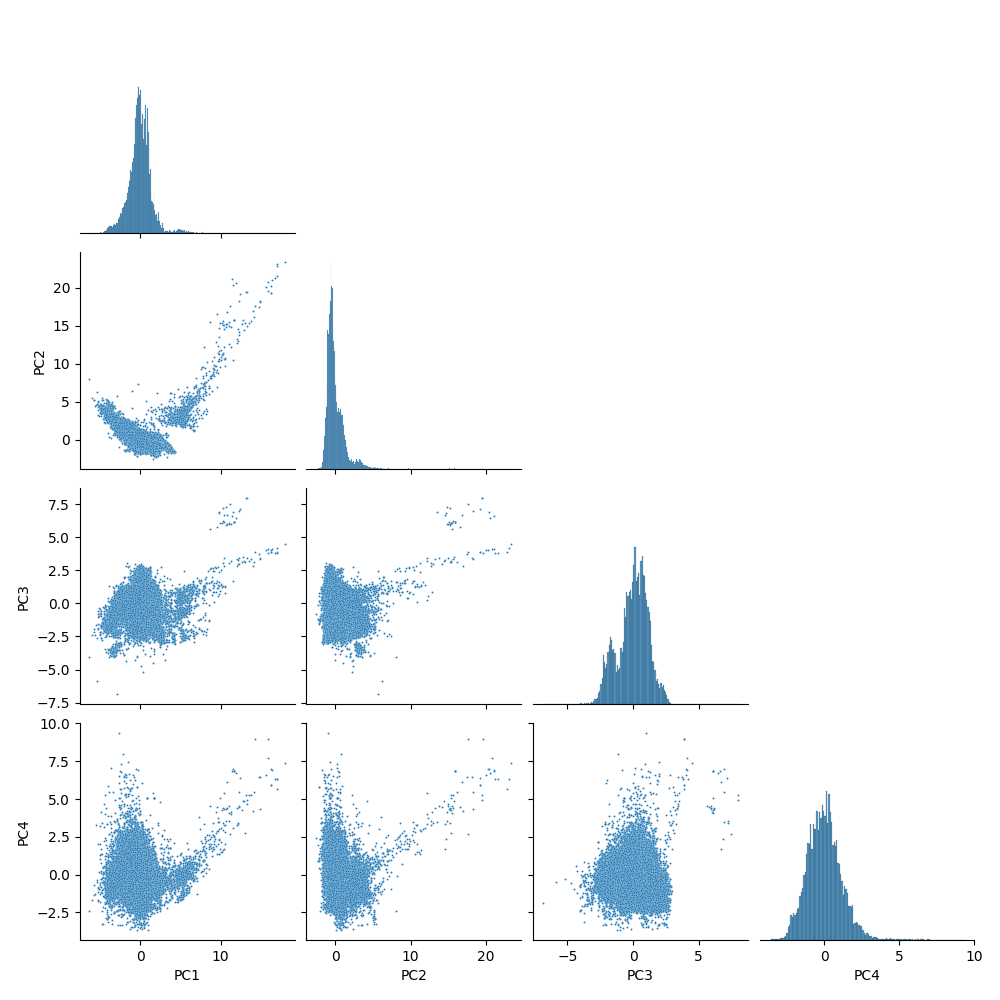

In [63]:
#pairplot for the first 8 principal components
hotel_pca_df = pd.DataFrame(x_pca, columns=['PC'+str(i) for i in range(1, 18)])
sns.pairplot(hotel_pca_df.iloc[:, :4], diag_kind='hist', corner=True, plot_kws={'s': 2})

In [71]:
pd.DataFrame(PCA.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                         'PC13', 'PC14', 'PC15', 'PC16', 'PC17'], index=x.columns)

PC1       PC2       PC3       PC4  \
no_of_adults                         -0.335822  0.062516  0.080924  0.143069   
no_of_children                       -0.227627  0.292916 -0.205202 -0.073128   
no_of_weekend_nights                 -0.123851 -0.007627  0.110123  0.402729   
no_of_week_nights                    -0.142931 -0.039292 -0.022431  0.546675   
type_of_meal_plan                    -0.008477 -0.154152  0.362948 -0.330885   
required_car_parking_space            0.006822  0.185091 -0.003715 -0.192042   
room_type_reserved                   -0.316836  0.379941 -0.189727  0.059778   
lead_time                            -0.043844 -0.218205  0.047633  0.508440   
arrival_year                         -0.142674  0.120346  0.603250  0.110401   
arrival_month                        -0.013581 -0.066349 -0.561829  0.084901   
arrival_date                         -0.034338  0.024149  0.079599  0.005379   
market_segment_type                  -0.416326  0.015369  0.210966 -0.100473   
repeated_guest                        0.365210  0.405125  0.008740  0.061577   
no_of_previous_cancellations          0.234091  0.394430  0.146783  0.161715   
no_of_previous_bookings_not_canceled  0.306480  0.441705  0.098688  0.151901   
avg_price_per_room                   -0.412665  0.276261 -0.081892 -0.108554   
no_of_special_requests               -0.223090  0.218792 -0.015182 -0.101824   

                                           PC5       PC6       PC7       PC8  \
no_of_adults                          0.242173 -0.165031 -0.181787 -0.052915   
no_of_children                       -0.269268  0.055828  0.085381  0.189035   
no_of_weekend_nights                  0.127010  0.538634  0.264046 -0.114692   
no_of_week_nights                     0.076324  0.162703  0.192391 -0.106453   
type_of_meal_plan                     0.409266 -0.021466  0.015510  0.220669   
required_car_parking_space            0.059443 -0.050232 -0.160401 -0.869532   
room_type_reserved                   -0.232815 -0.005634  0.007475  0.067642   
lead_time                             0.003004 -0.473692 -0.341688 -0.032213   
arrival_year                         -0.240700 -0.229954 -0.033305 -0.055832   
arrival_month                         0.437130 -0.174426 -0.158393  0.086104   
arrival_date                         -0.072860  0.524236 -0.820592  0.136100   
market_segment_type                   0.313348  0.010393  0.073495  0.097106   
repeated_guest                        0.079739 -0.007723 -0.015795 -0.025997   
no_of_previous_cancellations          0.218797 -0.099126 -0.009429  0.217113   
no_of_previous_bookings_not_canceled  0.174464 -0.044643 -0.032601  0.095236   
avg_price_per_room                   -0.086501 -0.196033 -0.059179  0.099614   
no_of_special_requests                0.420692  0.130791  0.016740 -0.145928   

                                           PC9      PC10      PC11      PC12  \
no_of_adults                         -0.573898  0.178966  0.018086 -0.113265   
no_of_children                        0.564176  0.097628  0.030536  0.130864   
no_of_weekend_nights                  0.084341  0.501618 -0.377795 -0.031647   
no_of_week_nights                     0.107327 -0.347058  0.654268 -0.147682   
type_of_meal_plan                     0.288838  0.280474  0.299310 -0.372325   
required_car_parking_space            0.171709  0.223397  0.206990  0.108646   
room_type_reserved                   -0.172944  0.109250  0.076070 -0.280993   
lead_time                             0.302484  0.066371 -0.180754  0.127870   
arrival_year                          0.182036 -0.132974 -0.198615 -0.285457   
arrival_month                         0.207544  0.122035 -0.084478 -0.239701   
arrival_date                          0.044133 -0.057972  0.091082  0.006482   
market_segment_type                   0.069530 -0.020739  0.080964  0.370727   
repeated_guest                        0.016183 -0.011015 -0.049088 -0.336550   
no_of_previous_cancellations         -0.0

Non-linear bidimensional mappings

In [25]:
dataset = hotel[numerical_columns]
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(dataset)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 36275 samples in 0.183s...
[t-SNE] Computed neighbors for 36275 samples in 2.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 36275
[t-SNE] Computed conditional probabilities for sample 2000 / 36275
[t-SNE] Computed conditional probabilities for sample 3000 / 36275
[t-SNE] Computed conditional probabilities for sample 4000 / 36275
[t-SNE] Computed conditional probabilities for sample 5000 / 36275
[t-SNE] Computed conditional probabilities for sample 6000 / 36275
[t-SNE] Computed conditional probabilities for sample 7000 / 36275
[t-SNE] Computed conditional probabilities for sample 8000 / 36275
[t-SNE] Computed conditional probabilities for sample 9000 / 36275
[t-SNE] Computed conditional probabilities for sample 10000 / 36275
[t-SNE] Computed conditional probabilities for sample 11000 / 36275
[t-SNE] Computed conditional probabilities for sample 12000 / 36275
[t-SNE] Computed conditional probabilities for sa

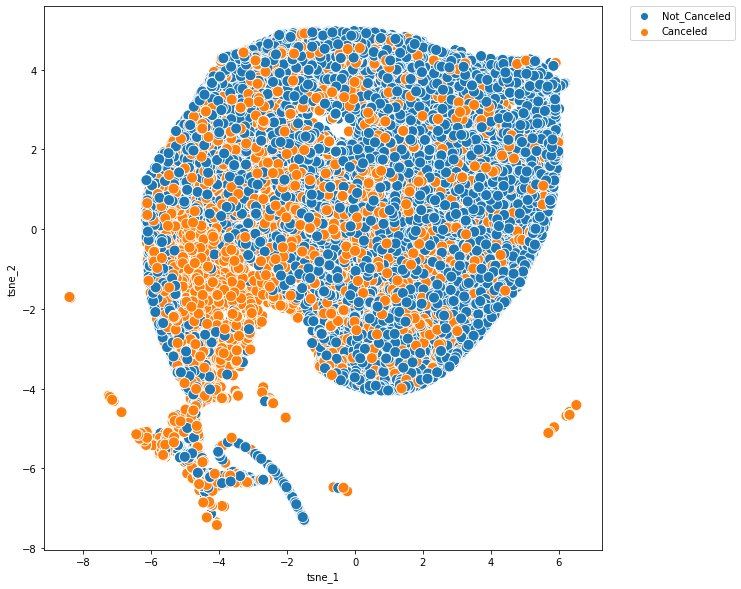

In [51]:
# plot the result of TSNE with the label color coded
tsne_result_df = pd.DataFrame({'tsne_1': tsne_results[:,0], 'tsne_2': tsne_results[:,1], 'label': hotel['booking_status']})
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 10)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
# lim = (tsne_results.min()-5, tsne_results.max()+5)
# ax.set_xlim(lim)
# ax.set_ylim(lim)
# ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)



### uMap

In [24]:
from sklearn.preprocessing import StandardScaler
data = hotel

for cat_col in categorical_columns:
    data[cat_col] = data[cat_col].astype('category').cat.codes

scaled_data = StandardScaler().fit_transform(data)

reducer = umap.UMAP()

embedding = reducer.fit_transform(scaled_data)

d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of the hotel dataset')

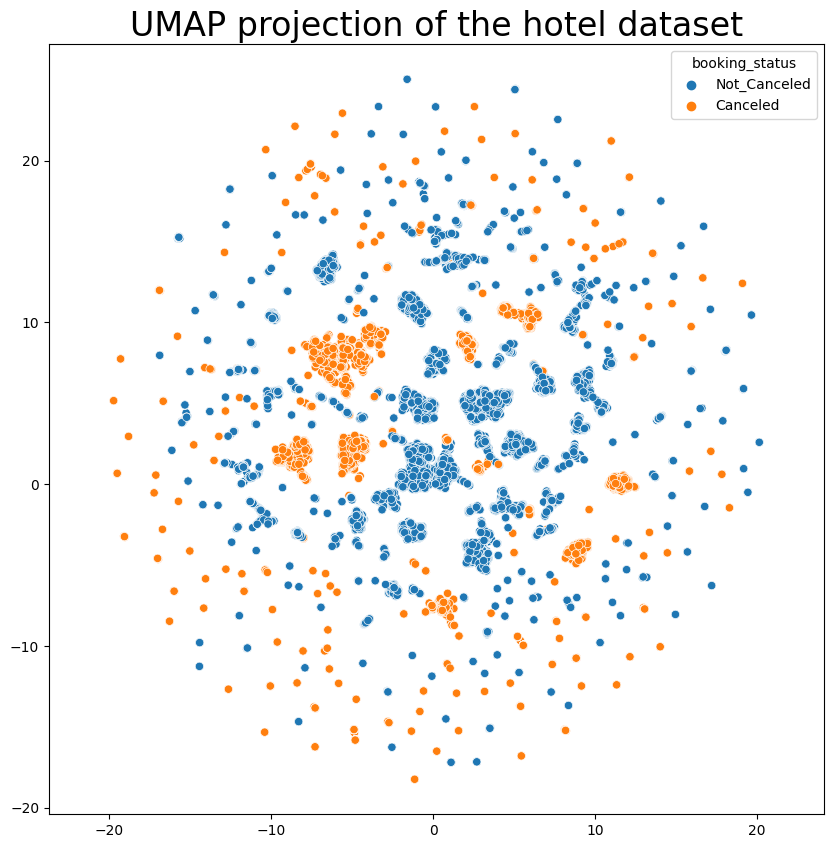

In [37]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=hotel.booking_status)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the hotel dataset', fontsize=24)

### Sammon

In [6]:
from sammon.sammon import sammon

df = hotel[numerical_columns]
# df = df.as_matrix()

y, e = sammon(df, 2, maxiter=1, display=1)

### T-test

In [77]:
temp_df = hotel.copy()

for cat_col in categorical_columns:
    temp_df[cat_col] = temp_df[cat_col].astype('category').cat.codes

t_stat, p_value = stats.ttest_ind(temp_df[hotel.booking_status == 'Canceled'], temp_df[hotel.booking_status == 'Not_Canceled'], equal_var=False)
for i in range(len(p_value)):
    print(hotel.columns[i], p_value[i], t_stat[i])

print(hotel[hotel.booking_status == 'Canceled']['lead_time'].median())
print(hotel[hotel.booking_status == 'Not_Canceled']['lead_time'].median())
print("---------------------")
print(hotel[hotel.booking_status == 'Canceled']['no_of_special_requests'].median())
print(hotel[hotel.booking_status == 'Not_Canceled']['no_of_special_requests'].median())


no_of_adults 1.9345253475709744e-68 17.535449990894485
no_of_children 2.0034501853140845e-10 6.364306623228386
no_of_weekend_nights 1.0093281704434595e-29 11.339848841821798
no_of_week_nights 3.157038245417444e-61 16.565709776138743
type_of_meal_plan 3.788817921395253e-07 5.0807289629243675
required_car_parking_space 4.683163282445571e-92 -20.40816019130208
room_type_reserved 1.3591073688645307e-05 4.351326442396521
lead_time 0.0 80.43905526483107
arrival_year 0.0 39.979169563518624
arrival_month 0.018947559599713164 -2.346696720839616
arrival_date 0.040037683236619305 2.053474703644861
market_segment_type 6.403309326293967e-182 28.957512801871914
repeated_guest 9.261449100647606e-178 -28.63541972000149
no_of_previous_cancellations 2.3066357827498886e-14 -7.635491077530978
no_of_previous_bookings_not_canceled 3.852262564191205e-60 -16.402036037094916
avg_price_per_room 1.0983691249622683e-174 28.396205201360804
no_of_special_requests 0.0 -56.196940514819836
booking_status 0.0 -inf
122.

C:\Users\cezar\AppData\Local\Temp\ipykernel_6800\1998838173.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(temp_df[hotel.booking_status == 'Canceled'], temp_df[hotel.booking_status == 'Not_Canceled'], equal_var=False)


### Stacked histograms

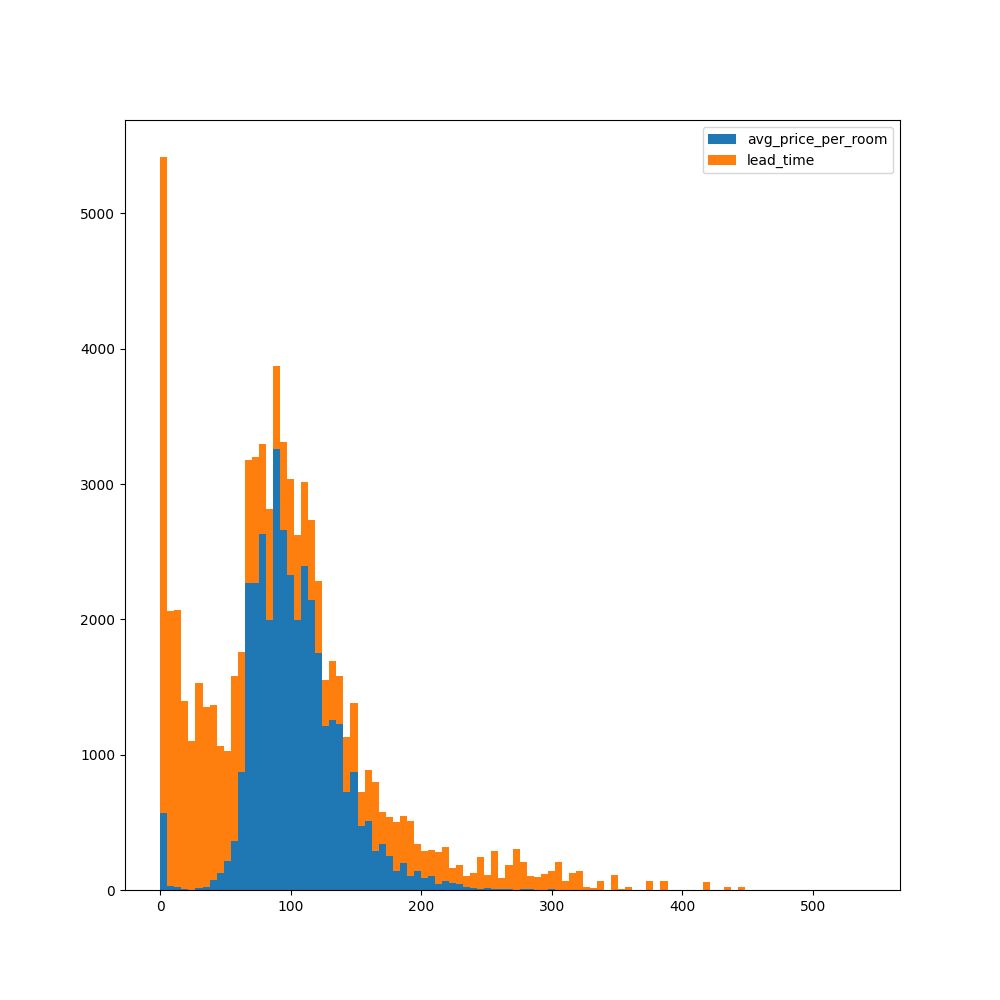

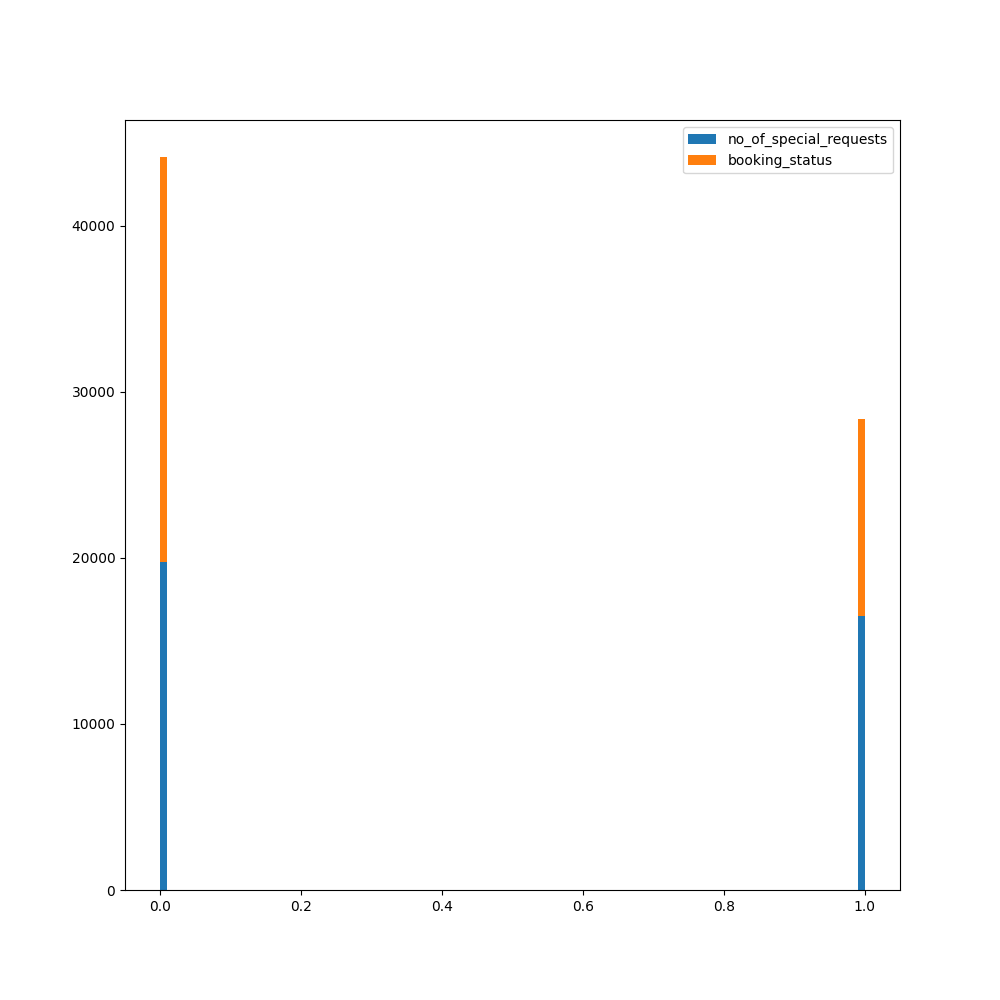

In [77]:
plt.figure(figsize=(10, 10))
plt.hist([hotel["avg_price_per_room"], hotel["lead_time"]], bins = 100, stacked=True, label = [hotel["avg_price_per_room"].name, hotel["lead_time"].name])
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
binary_request = pd.Series(np.where(hotel["no_of_special_requests"] > 0, 1, 0))
binary_status = pd.Series(np.where(hotel["booking_status"] == 'Canceled', 1, 0))
plt.hist([binary_request, binary_status], bins = 100, stacked=True, label = [hotel["no_of_special_requests"].name, hotel["booking_status"].name])
plt.legend()
plt.show()


### Conditional boxplots

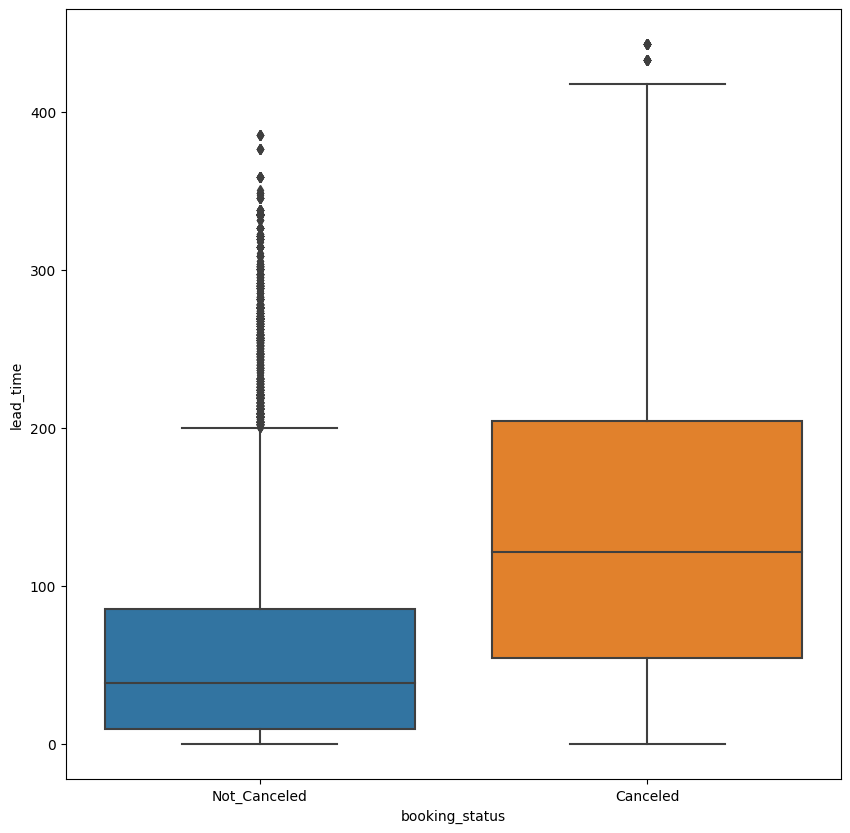

76.0
Outliers :  1035
150.0
Outliers :  42


In [71]:
#conditioned boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x="booking_status", y="lead_time", data=hotel)
plt.show()

#determine the number of outliers
Q1 = hotel[hotel.booking_status == 'Not_Canceled']["lead_time"].quantile(0.25)
Q3 = hotel[hotel.booking_status == 'Not_Canceled']["lead_time"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count = hotel[hotel.booking_status == 'Not_Canceled']["lead_time"][hotel.lead_time > Q3 + 1.5*IQR].count() +\
        hotel[hotel.booking_status == 'Not_Canceled']["lead_time"][hotel.lead_time < Q1 - 1.5*IQR].count()
print("Outliers : ", count)

#determine the number of outliers
# for entry in hotel[hotel.booking_status == 0]["lead_time"]:
#     if entry > Q3 + 1.5*IQR or entry < Q1 - 1.5*IQR:
        

Q1 = hotel[hotel.booking_status == 'Canceled']['lead_time'].quantile(0.25)
Q3 = hotel[hotel.booking_status == 'Canceled']['lead_time'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count = hotel[hotel.booking_status == 'Canceled']["lead_time"][hotel.lead_time > Q3 + 1.5*IQR].count() +\
        hotel[hotel.booking_status == 'Canceled']["lead_time"][hotel.lead_time < Q1 - 1.5*IQR].count()

print("Outliers : ", count)



### Market segment type

In [152]:
pd.crosstab(hotel.market_segment_type, hotel.booking_status)

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation                   37            88
Complementary               0           391
Corporate                 220          1797
Offline                  3153          7375
Online                   8475         14739

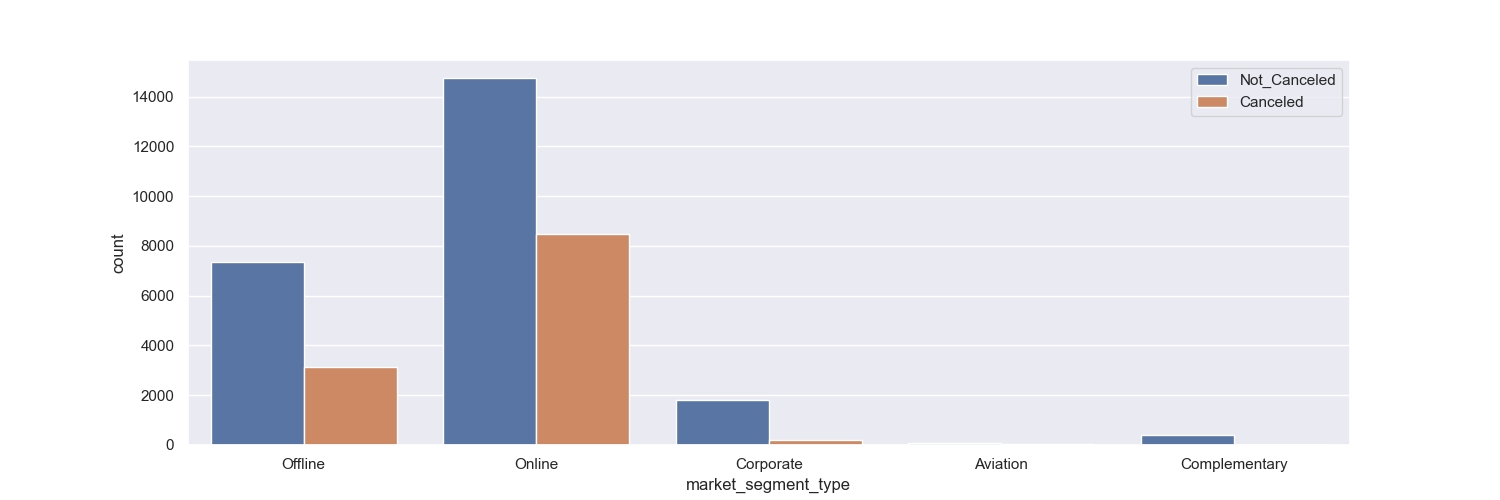

In [154]:
plt.figure(figsize=[15,5])
sns.set()
sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = hotel)
plt.legend(loc = 1)

Putem observa cum se distribuie rezervarile in functie de tipul de pachet :
- rezervarile facute online au cea mai mare rata de anulare : 37.5, probabil din cauza ca anularea este mult mai usoara
- rezervarile corporate si complementary au cea mai mica rata de anulare: 10.9% si respectiv 0%
- rezervarile din aviation au o rata de anulare de 29%, ce poate fi datorata evenimentelor neprevazute

In [156]:
hotel.groupby('arrival_month')['booking_status'].value_counts(normalize = True)  

arrival_month  booking_status
1              Not_Canceled      0.976331
               Canceled          0.023669
2              Not_Canceled      0.747653
               Canceled          0.252347
3              Not_Canceled      0.703138
               Canceled          0.296862
4              Not_Canceled      0.636330
               Canceled          0.363670
5              Not_Canceled      0.635104
               Canceled          0.364896
6              Not_Canceled      0.596940
               Canceled          0.403060
7              Not_Canceled      0.550000
               Canceled          0.450000
8              Not_Canceled      0.609756
               Canceled          0.390244
9              Not_Canceled      0.666450
               Canceled          0.333550
10             Not_Canceled      0.646417
               Canceled          0.353583
11             Not_Canceled      0.706376
               Canceled          0.293624
12             Not_Canceled      0.866931
    

Observam ca lunile cu cea mai mare rata de anulare sunt iunie, iulie si august, cu iulie avand cea mai mare rata de anulare : 45%

In [ ]:
#conditioned boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x="booking_status", y="avg_price_per_room", data=hotel)
plt.show()

#determine the number of outliers
Q0 = hotel[hotel.booking_status == 'Not_Canceled']["avg_price_per_room"].quantile(0.0)
Q1 = hotel[hotel.booking_status == 'Not_Canceled']["avg_price_per_room"].quantile(0.25)
Q3 = hotel[hotel.booking_status == 'Not_Canceled']["avg_price_per_room"].quantile(0.75)
Q4 = hotel[hotel.booking_status == 'Not_Canceled']["avg_price_per_room"].quantile(1.0)
IQR = Q3 - Q1
print("Q0", Q0)
print("Q4", Q4)
print(IQR)

count = hotel[hotel.booking_status == 'Not_Canceled']["avg_price_per_room"][hotel.avg_price_per_room > Q3 + 1.5*IQR].count() +\
        hotel[hotel.booking_status == 'Not_Canceled']["avg_price_per_room"][hotel.avg_price_per_room < Q1 - 1.5*IQR].count()
print("Outliers : ", count)

#determine the number of outliers
# for entry in hotel[hotel.booking_status == 0]["avg_price_per_room"]:
#     if entry > Q3 + 1.5*IQR or entry < Q1 - 1.5*IQR:
        
Q0 = hotel[hotel.booking_status == 'Canceled']["avg_price_per_room"].quantile(0.0)
Q1 = hotel[hotel.booking_status == 'Canceled']['avg_price_per_room'].quantile(0.25)
Q3 = hotel[hotel.booking_status == 'Canceled']['avg_price_per_room'].quantile(0.75)
Q4 = hotel[hotel.booking_status == 'Canceled']["avg_price_per_room"].quantile(1.0)
IQR = Q3 - Q1
print("Q0", Q0)
print("Q4", Q4)
print(IQR)

count = hotel[hotel.booking_status == 'Canceled']["avg_price_per_room"][hotel.avg_price_per_room > Q3 + 1.5*IQR].count() +\
        hotel[hotel.booking_status == 'Canceled']["avg_price_per_room"][hotel.avg_price_per_room < Q1 - 1.5*IQR].count()

print("Outliers : ", count)

